<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
!ls ../data/sarcasm/

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train_df = pd.read_csv('../data/sarcasm/train-balanced-sarcasm.csv')

In [4]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.dropna(subset=['comment'], inplace=True)

We notice that the dataset is indeed balanced

In [7]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [8]:
train_df['date'] = pd.to_datetime(train_df['date'])

We split data into training and validation parts.

In [9]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

## Tasks №1:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example

In [10]:
import seaborn as sns

Text(0.5, 1.0, 'Распределение целевых меток')

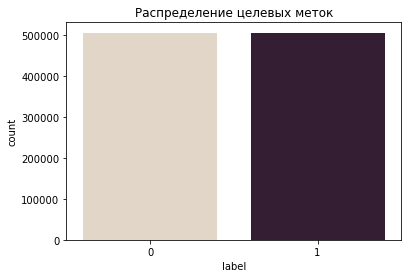

In [11]:
ax = sns.countplot(x='label', palette="ch:.25", data=train_df)
ax.set_title('Распределение целевых меток')

Text(0.5, 1.0, 'Количество комментариев в зависимости от года')

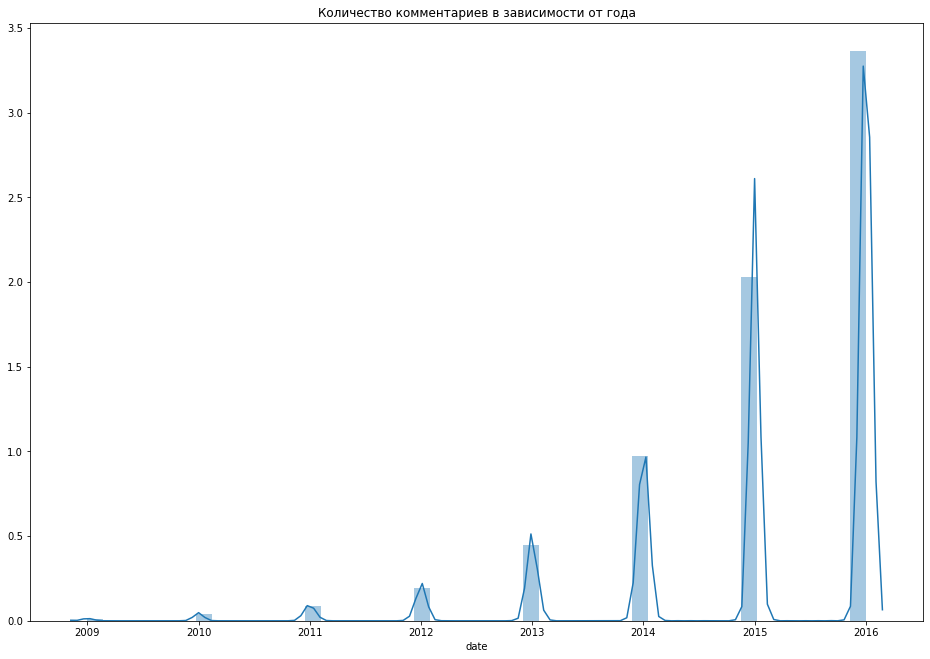

In [12]:
fig, ax = plt.subplots(figsize=(16, 11))

years = pd.to_datetime(train_df['date'])

ax = sns.distplot(years.dt.year)
ax.set_title("Количество комментариев в зависимости от года")

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=700, 
                    height=350,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

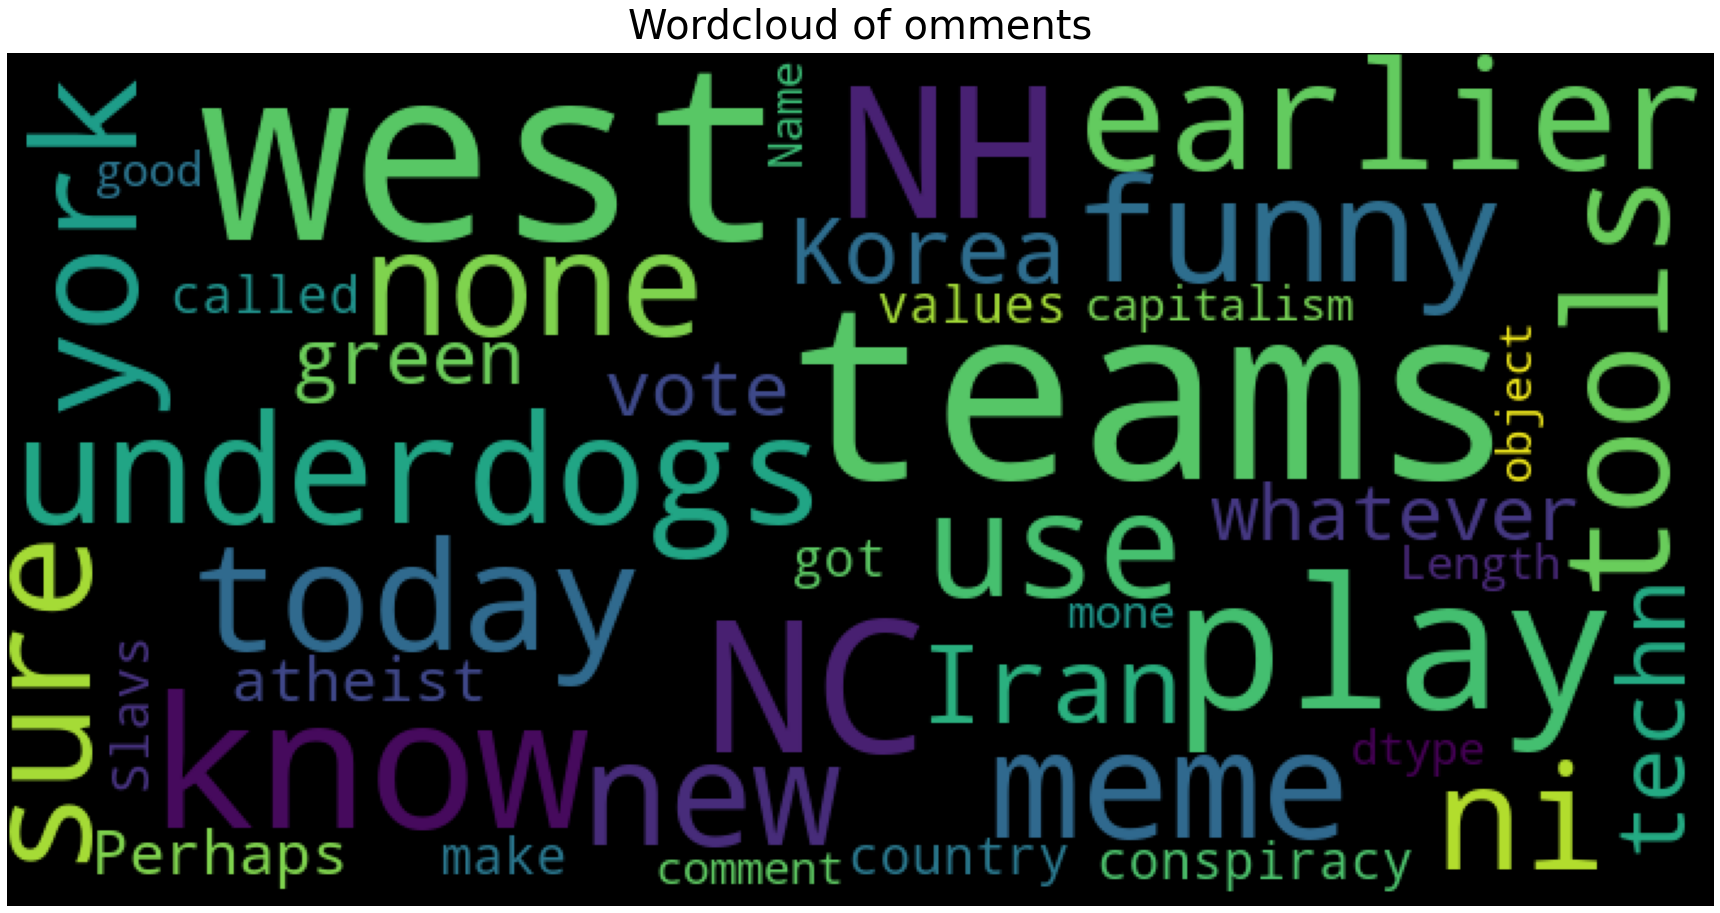

In [15]:
plot_wordcloud(train_df["comment"], title="Wordcloud of omments")

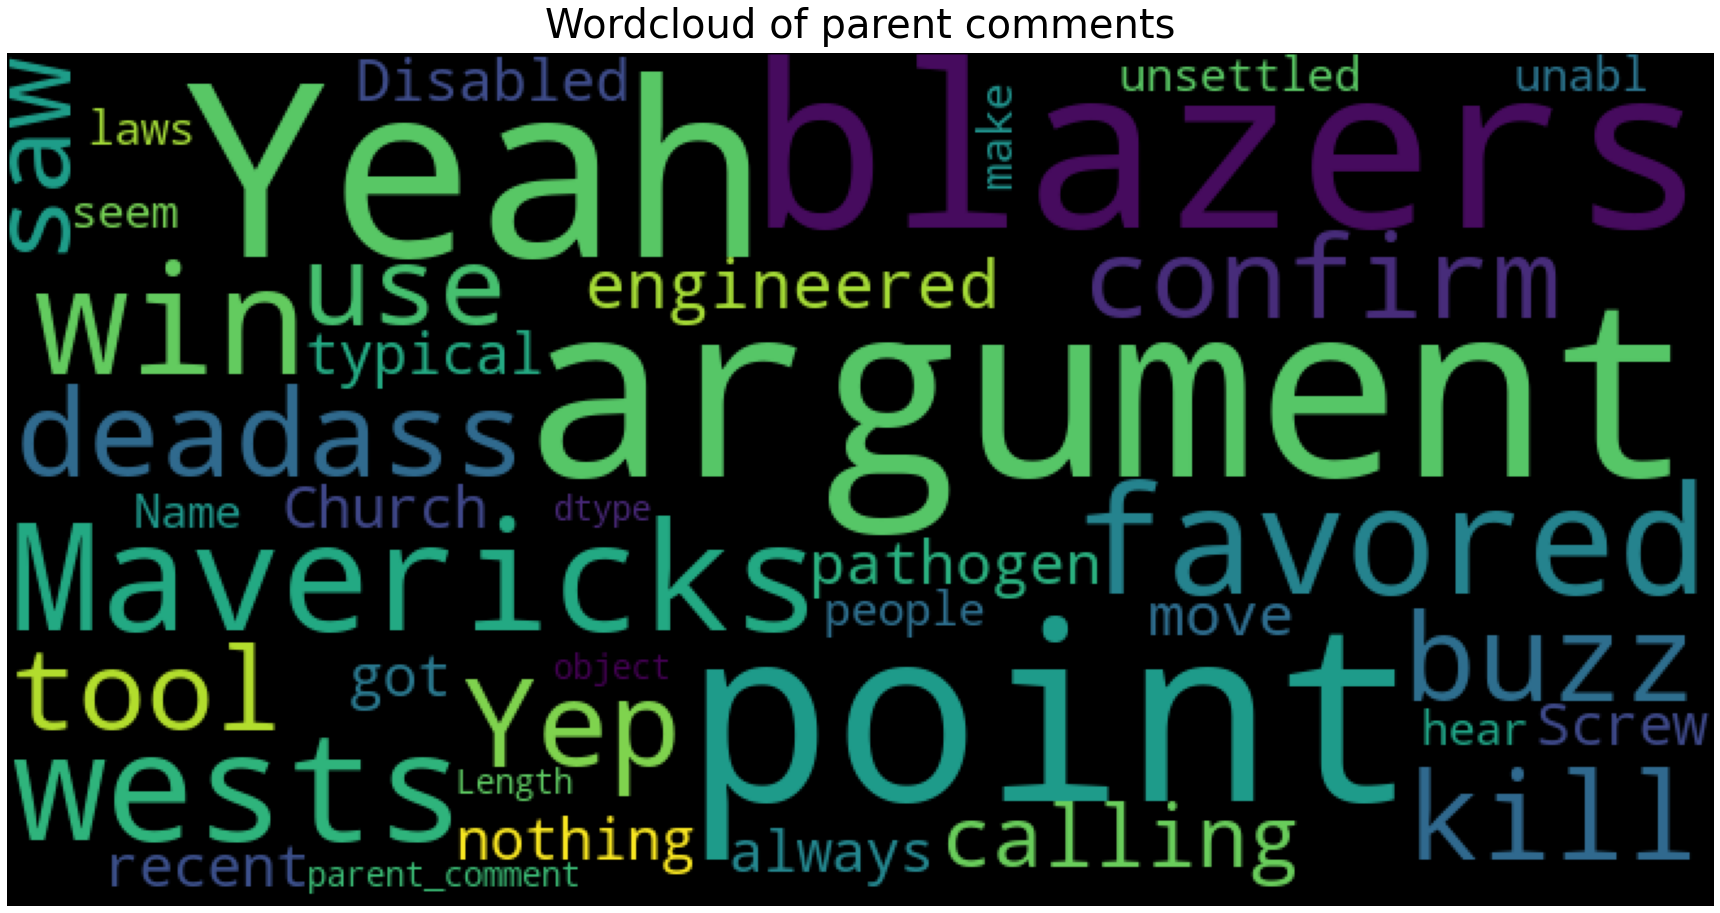

In [16]:
plot_wordcloud(train_df["parent_comment"], title="Wordcloud of parent comments")

In [17]:
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

comment_dict = defaultdict(int)
parent_comment_dict = defaultdict(int)

for sent in train_df["comment"]:
    for word in generate_ngrams(sent):
        comment_dict[word] += 1
for sent in train_df["parent_comment"]:
    for word in generate_ngrams(sent):
        parent_comment_dict[word] += 1

In [18]:
comments_sorted = pd.DataFrame(sorted(comment_dict.items(), key=lambda x: x[1])[::-1])
comments_sorted.columns = ['words', 'count']
parent_comments_sorted = pd.DataFrame(sorted(parent_comment_dict.items(), key=lambda x: x[1])[::-1])
parent_comments_sorted.columns = ['words', 'count']

Text(0.5, 1.0, 'First 200 most popular words in Comment column of dataframe')

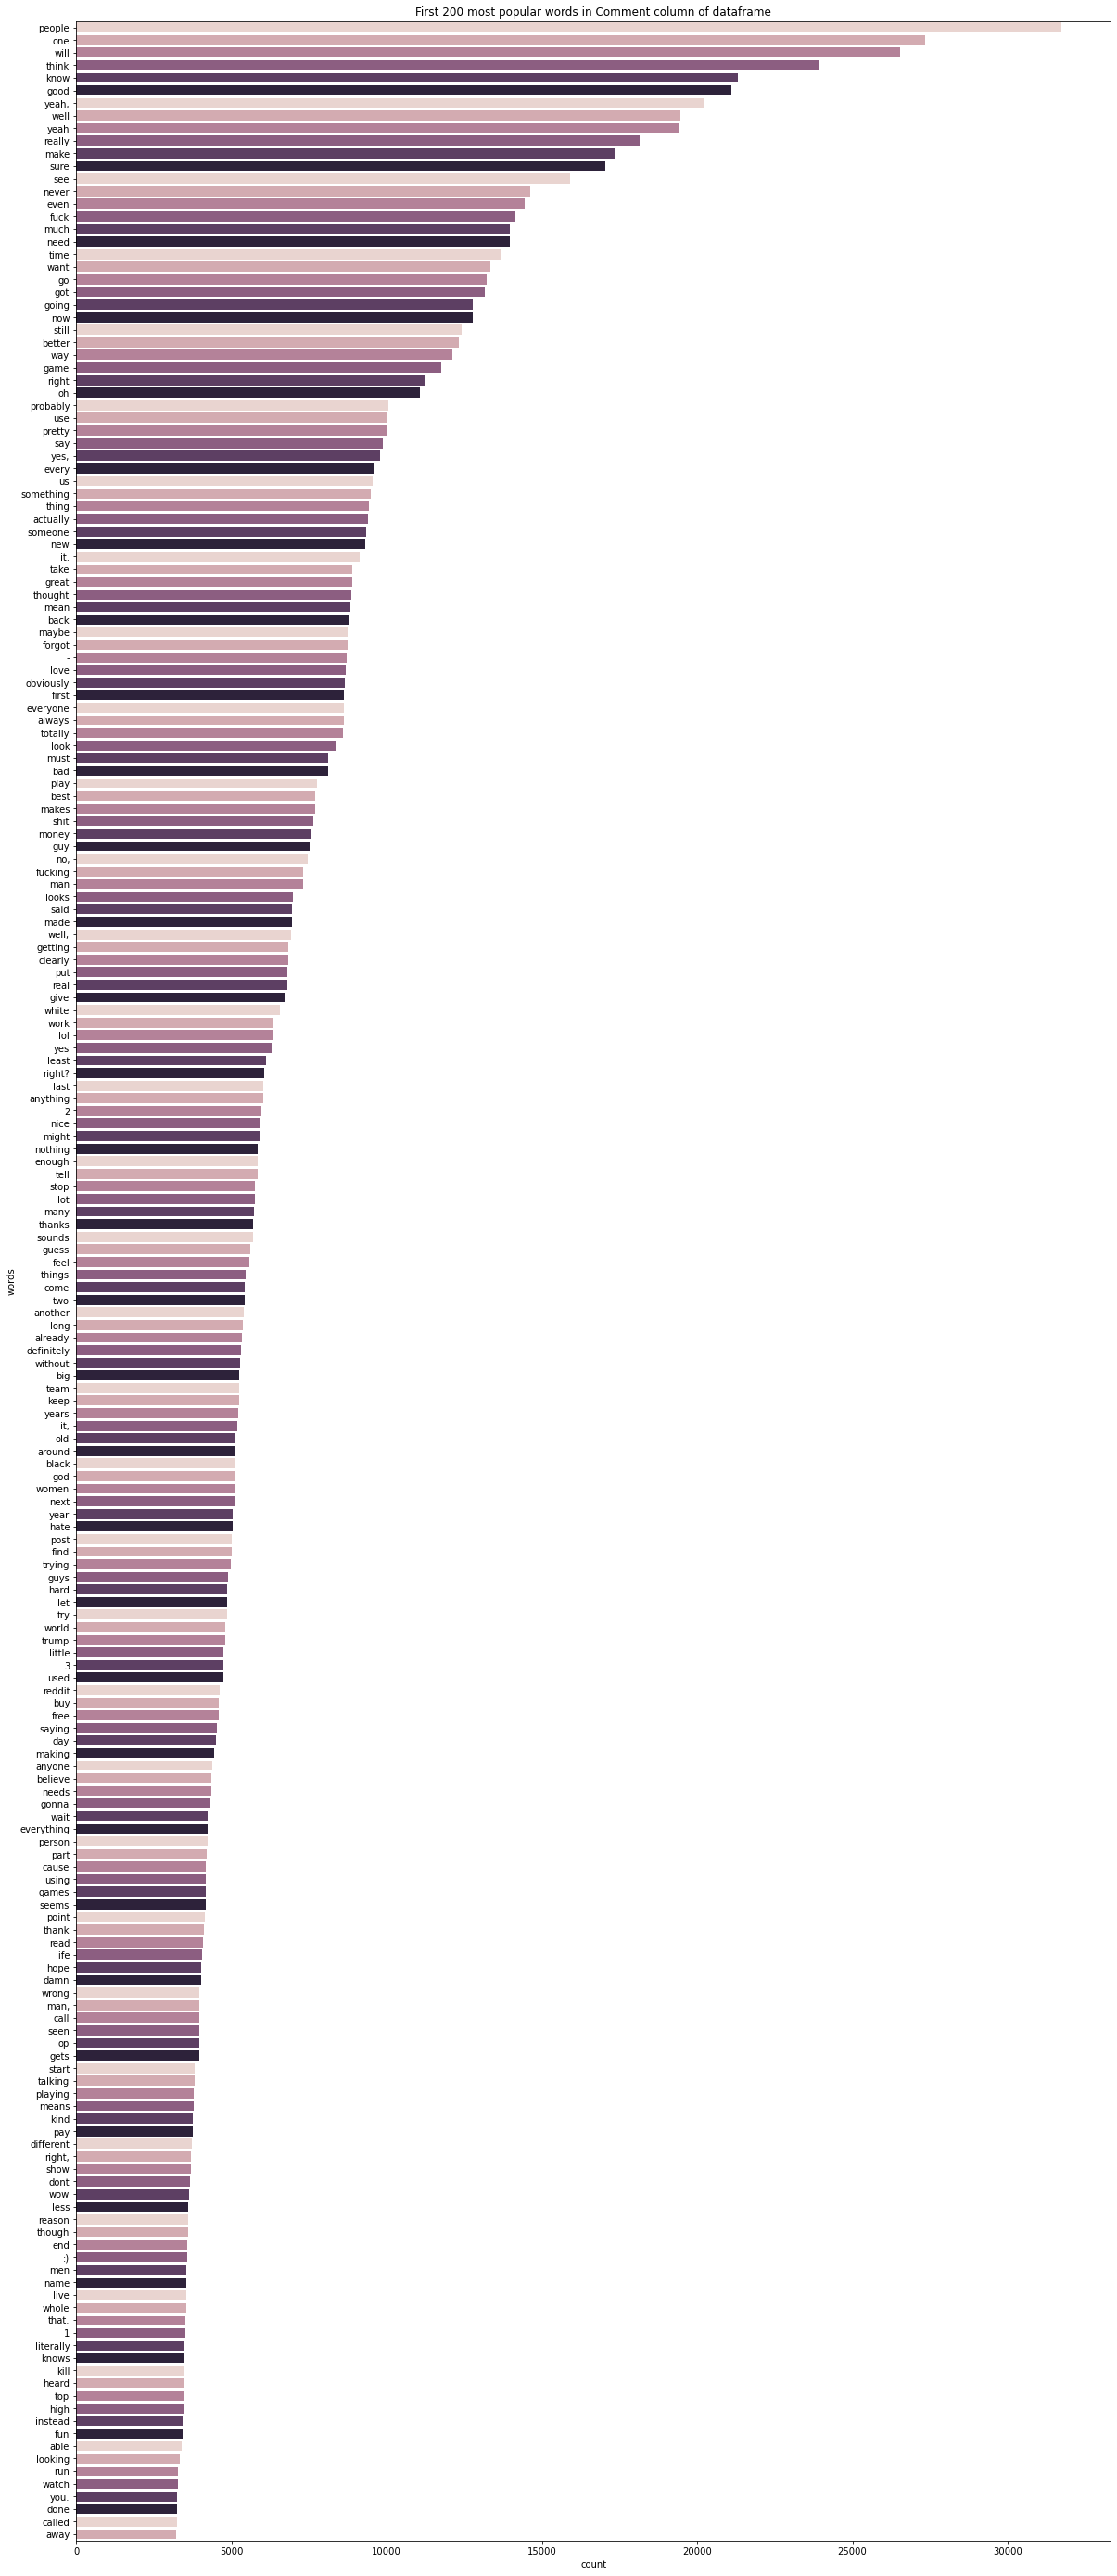

In [19]:
fig, ax = plt.subplots(figsize=(20, 50))

sns.barplot(x="count", y="words", data=comments_sorted.iloc[:200],
            label="Total", palette = sns.cubehelix_palette(), orient='h')
ax.set_title('First 200 most popular words in Comment column of dataframe')

Text(0.5, 1.0, 'First 200 most popular words in Parent comment column of dataframe')

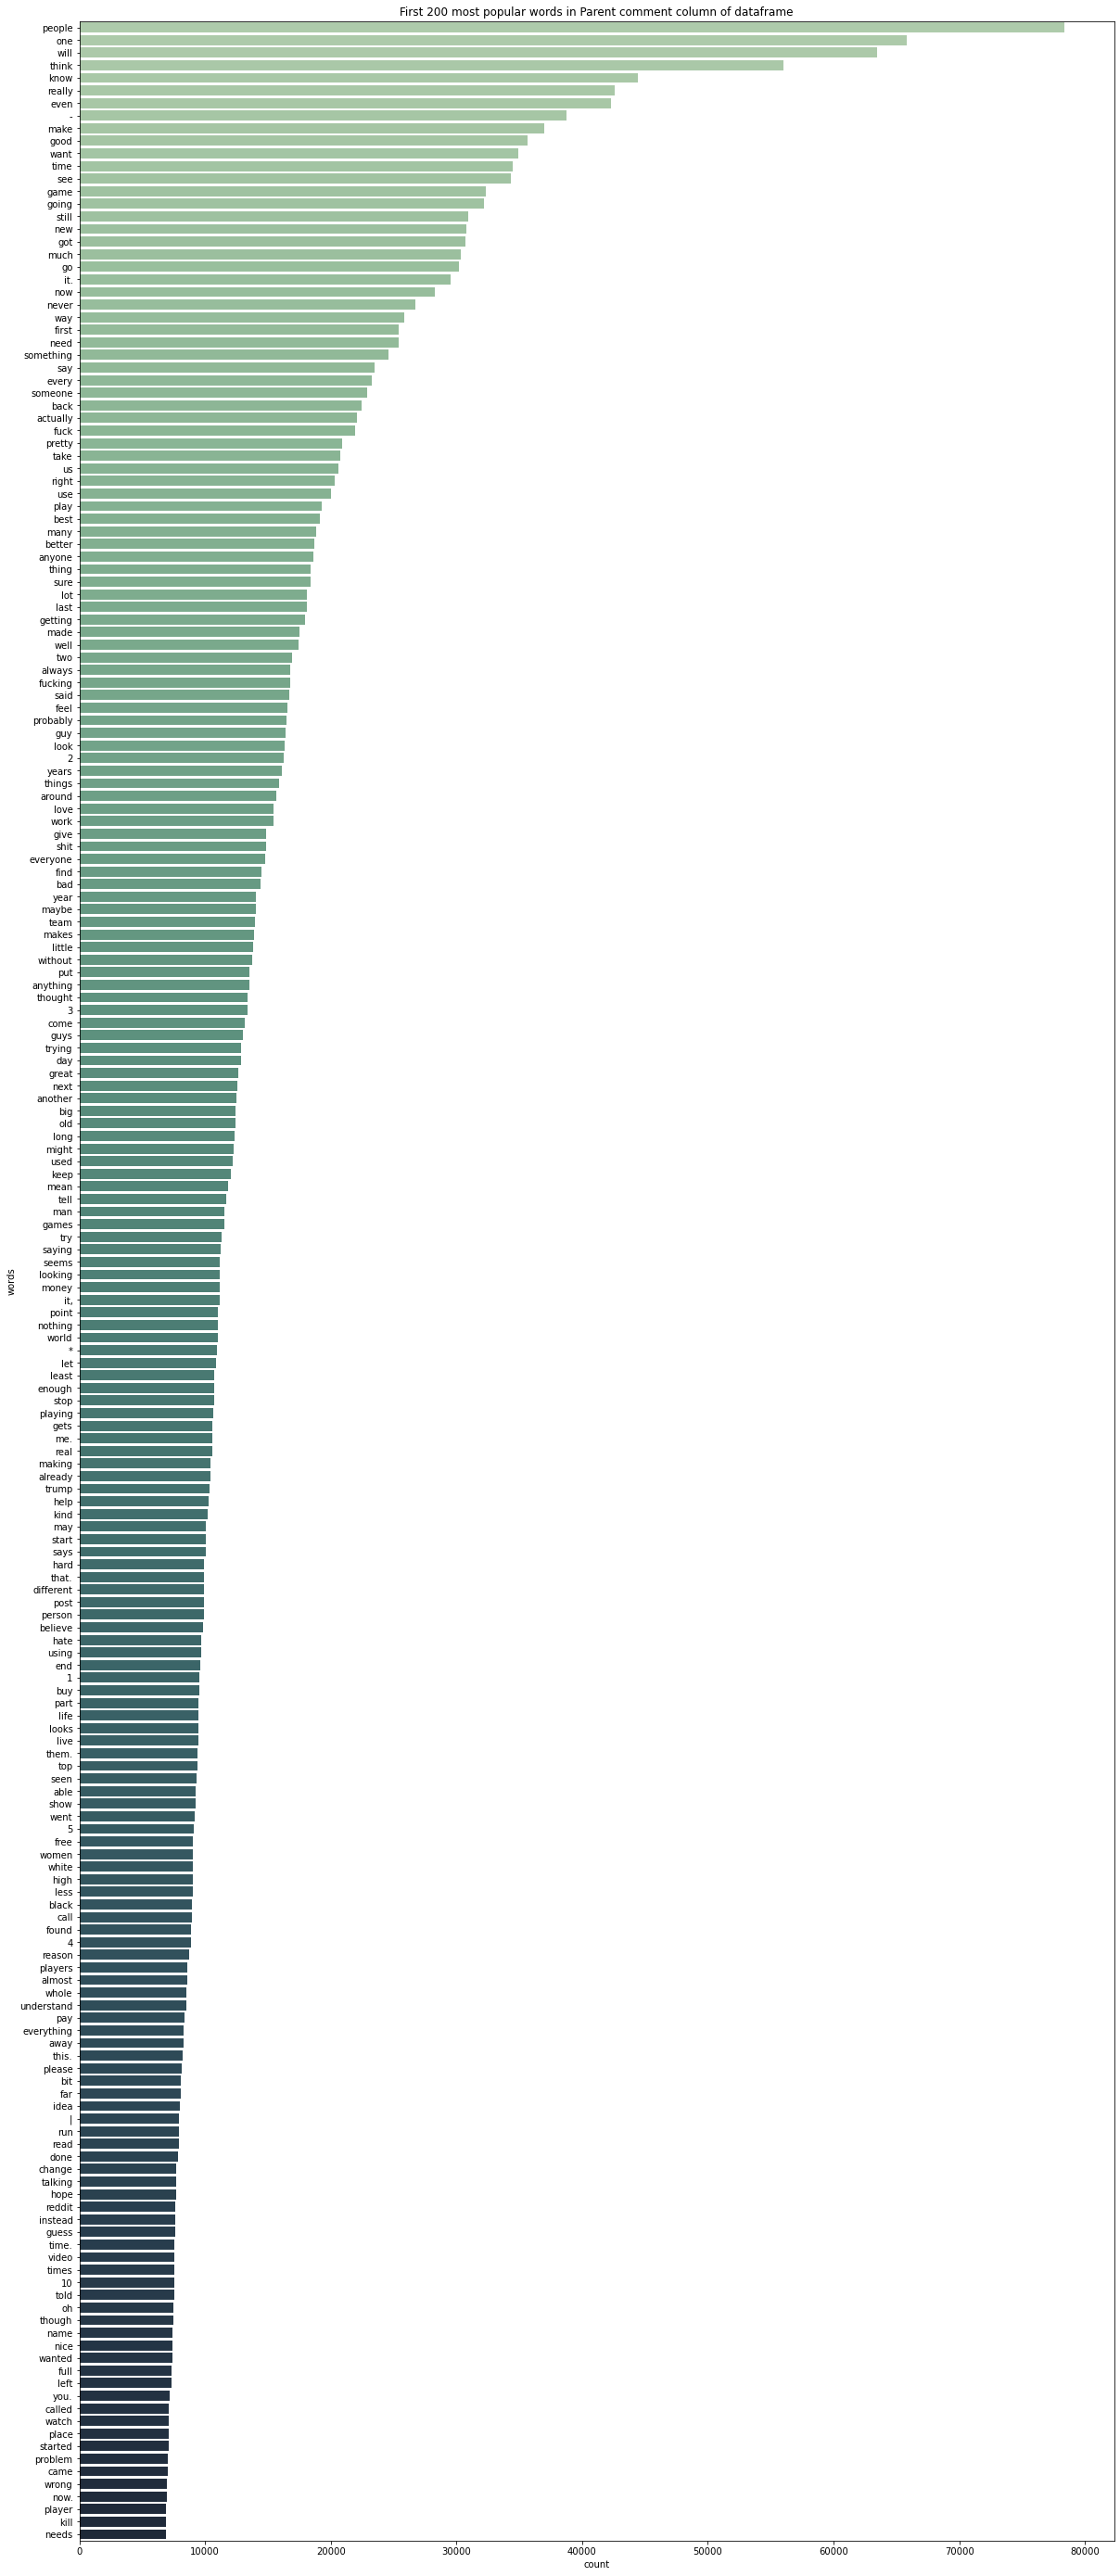

In [20]:
fig, ax = plt.subplots(figsize=(20, 50))

sns.barplot(x="count", y="words", data=parent_comments_sorted.iloc[:200],
            label="Total", palette='ch:r=-.5,l=.75', orient='h')
ax.set_title('First 200 most popular words in Parent comment column of dataframe')

Text(0.5, 1.0, 'Comment number of words in each class')

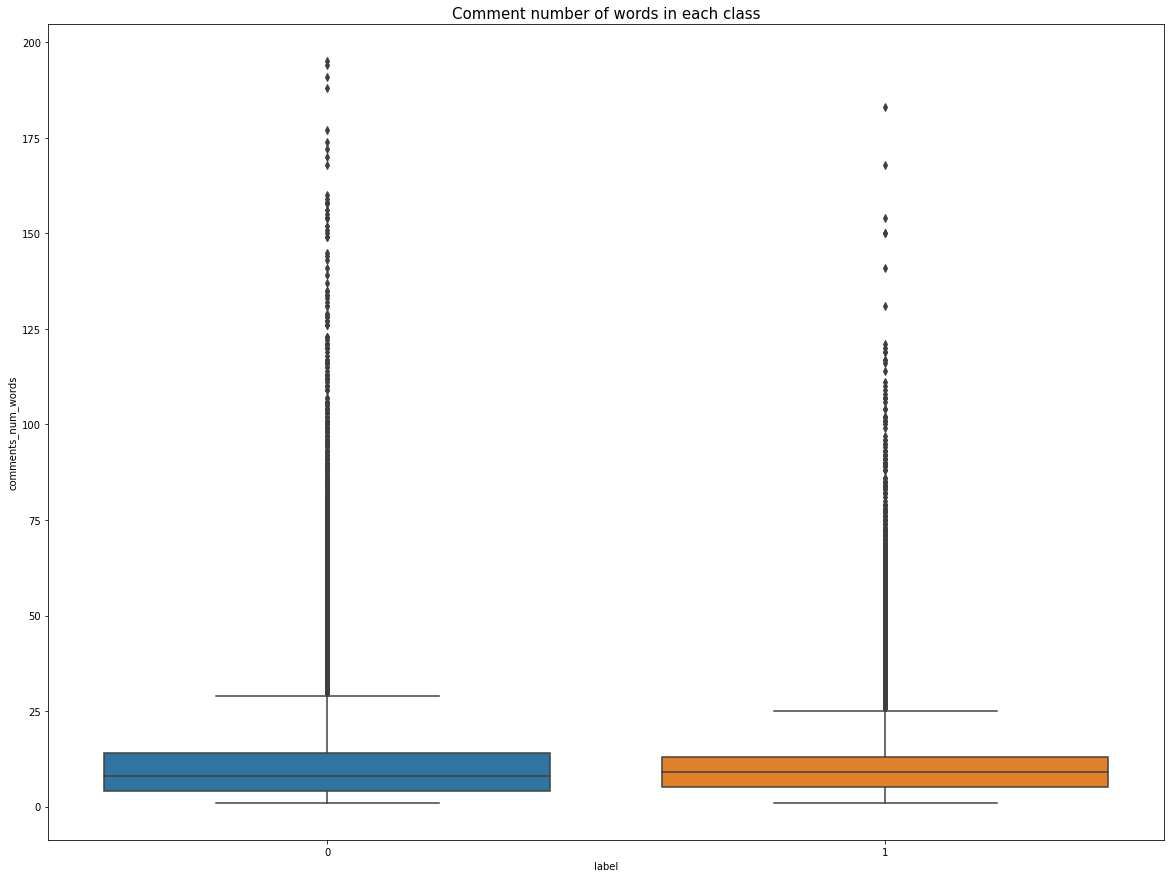

In [21]:
fig, axes = plt.subplots(figsize=(20, 15))

train_df["comments_num_words"] = train_df["comment"].apply(lambda x: len(str(x).split()))

sns.boxplot(x='label', y='comments_num_words', data=train_df[train_df['comments_num_words'] < 200])
axes.set_title("Comment number of words in each class", fontsize=15)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   label               1010773 non-null  int64         
 1   comment             1010773 non-null  object        
 2   author              1010773 non-null  object        
 3   subreddit           1010773 non-null  object        
 4   score               1010773 non-null  int64         
 5   ups                 1010773 non-null  int64         
 6   downs               1010773 non-null  int64         
 7   date                1010773 non-null  datetime64[ns]
 8   created_utc         1010773 non-null  object        
 9   parent_comment      1010773 non-null  object        
 10  comments_num_words  1010773 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 92.5+ MB


In [23]:
train_df.drop(['comments_num_words'], axis=1, inplace=True)

## Tasks №2:
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).

In [24]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

In [25]:
pipeline.fit(train_texts, y_train)

C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [26]:
predictions = pipeline.predict(valid_texts)

In [27]:
accuracy_score(predictions, y_valid)

0.6931347796148701

## Tasks №3:
3. Plot the words/bigrams which a most predictive of sarcasm (you can use eli5 for that)

In [28]:
import eli5

eli5.show_weights(estimator=pipeline.named_steps['clf'], vec=pipeline.named_steps['tfidf'])

C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+7.002,obviously
+6.094,totally
+5.804,clearly
+5.227,forgot
+5.184,duh
+5.068,dare
+4.885,dropped
+4.779,yeah
+4.766,because
+4.693,constructive


## Tasks №4:
4.  Optionally - add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.


In [29]:
subreddits = train_df['subreddit']
train_subreddits, test_subreddits = train_test_split(subreddits, random_state=17)

In [30]:
vectorizer = TfidfVectorizer()

In [31]:
X_train_texts = vectorizer.fit_transform(train_texts)
X_test_texts = vectorizer.transform(valid_texts)

X_train_subreddits = vectorizer.fit_transform(train_subreddits)
X_test_subreddits = vectorizer.transform(test_subreddits)

In [32]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_test = hstack([X_test_texts, X_test_subreddits])

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

model = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.7, random_state=718)

parameters = {
    'max_iter': (7, 15, 40),
    'C': (0.01, 0.001, 0.00001),
    'penalty': ('l2', 'l1'),
}

grid_search = GridSearchCV(model, parameters, cv=cv)

grid_search.fit(X_train, y_train)

C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Neighbourhood\Anaconda3\lib\

C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Neighbourhood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Neighbourhood\Anaconda3\lib\

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=718, test_size=0.7,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': (0.01, 0.001, 1e-05), 'max_iter': (7, 15, 40),
                         'penalty': ('l2', 'l1')})

In [34]:
predictions = grid_search.best_estimator_.predict(X_test)

In [35]:
accuracy_score(predictions, y_valid)

0.6755166327653209